In [20]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
##Imports pandas, Numpy and soup to our code

In [21]:
url = "https://]"

pd.read_html( url )

FileNotFoundError: [Errno 2] No such file or directory: 'List of countries by GDP (nominal) - Wikipedia.htm'

In [22]:
##Activity 8

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
##Loading libraries

In [24]:
import os

cwd = os.getcwd()  ## Get the current working directory (cwd)
files = os.listdir(cwd)  ## Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/Users/aarondrexler/Documents/DSC 540': ['DSC 540 Weeks 1-2.ipynb', '.DS_Store', 'DSC540 Week 5-6.ipynb', 'sales_record.csv', 'world-population.xlsm', '.ipynb_checkpoints', 'visit_data.csv']


In [25]:
df = pd.read_csv("visit_data.csv")
df
##read and load a csv file into df

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0
...,...,...,...,...,...,...,...
995,996,Averil,Pickover,apickoverrn@vk.com,Male,10.45.16.167,1305.0
996,997,Walton,Hallewell,whallewellro@nasa.gov,NaN,231.224.238.232,2531.0
997,998,NaN,NaN,ggallamorerp@meetup.com,Female,118.65.94.40,NaN
998,999,Sapphira,Terron,sterronrq@wordpress.org,NaN,24.77.234.208,250.0


In [26]:
format(any(df.first_name.duplicated()))
##Checks for any duplicate first names

'True'

In [27]:
format(any(df.last_name.duplicated()))
##Checks for any duplicate last names

'True'

In [28]:
format(any(df.email.duplicated()))
##Checks for any duplicate emails

'False'

In [29]:
format(any(df.ip_address.duplicated()))
##Checks for any duplicate IP_Addresses

'False'

In [30]:
 df.email.isnull().values.any()
    ##Checks to see if there are any null entries for emails

False

In [31]:
 df.ip_address.isnull().values.any()
    ##Checks to see if there are any null entries for IP addresses

False

In [32]:
 df.visit.isnull().values.any()
    ##Checks to see if there are any null entries for visits

True

In [34]:
## to eliminate outliers, I plan to use IQR to identify those outliers
## quartile 3
q3 = np.nanquantile(df.visit, 0.75)
q3

2224.25

In [36]:
q1 = np.nanquantile(df.visit, 0.25)
q1
##Quartile 3

794.5

In [37]:
IQR = q3-q1
IQR

1429.75

In [38]:
##considered an outlier if falles outside of multiplier of 1.5 * IQR outside of Q1 or Q3
##https://kanoki.org/2020/04/23/how-to-remove-outliers-in-python/
low = q1 - 1.5*IQR
low
##none fall below this value

-1350.125

In [39]:
high = q3 + 1.5*IQR
high

4368.875

In [40]:
##no values are either below -1350.125 or 4368.875 so there are no outliers in this data

In [41]:
## if there had been, I would have iterated through list to eliminate those outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7ffbbc7ba970>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffbbc841070>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffbbc7ba610>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffbbc841730>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ffbbc841a90>],
 'means': []}

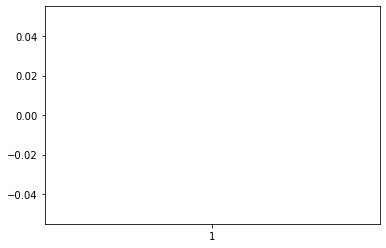

In [46]:
plt.boxplot(df.visit, notch=True)